In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [28]:
all_tests = {}
all_times = {}

In [29]:
all_sizes = [64, 128, 256, 512, 1024, 2048, 4096]

In [30]:
for n in all_sizes:
    print("Testing size: ", n)
    all_times[n] = []
    a = -10
    b = 10
    tests = []
    for w in range(3):
        print(f'Test {w + 1}: ')
        tests.append(np.random.random((n, n)) * (b - a) + a)
        my_file = open("test.txt", "w")
        for i in range(n):
            for j in range(n):
                my_file.write(str(tests[w][i][j]) + " ")
        my_file.close()
        
        print('Starting algorithm')
        os.system(f'./main {n}')
        print('Finished algorithm')
        
        A = np.loadtxt('A.txt')
        U = np.loadtxt('U.txt')
        V = np.loadtxt('V.txt')
        B = np.loadtxt('B.txt')
        time = int(open('Time.txt').readline())
        print("Frob: ", np.linalg.norm(A @ V - U @ B))
        print(time / 1000000000)
        all_times[n].append(time)
    print("\n")
        
    all_tests[n] = tests
        
        

Testing size:  64
Test 1: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.0009316219335388278
0.000356522
Test 2: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.0009105284176905344
0.00024703
Test 3: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.0009549381042475151
0.000249379


Testing size:  128
Test 1: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.0020260825271803612
0.002232487
Test 2: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.0020631902176331696
0.003061705
Test 3: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.002070635273038012
0.002873431


Testing size:  256
Test 1: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.004390936188470179
0.015857869
Test 2: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.004230185987000084
0.014491744
Test 3: 
Starting algorithm
Finished algorithm
1
2
3
4
5
Frob:  0.004421498940236532
0.014474268


Testing size:  512
Test 1: 
Starting algorithm
Finished algor

In [31]:
all_times

{64: [356522, 247030, 249379],
 128: [2232487, 3061705, 2873431],
 256: [15857869, 14491744, 14474268],
 512: [119388028, 120976429, 127238694],
 1024: [1160250807, 1132273099, 1138559058],
 2048: [9455310181, 9283904635, 9258098237],
 4096: [74427581196, 75519023515, 74087756597]}

In [32]:
x = np.array(all_sizes)
y = np.array([np.array(all_times[i]).mean() for i in all_sizes])

In [33]:
y = y / 1000000000
np.round(y, 5)

array([2.800000e-04, 2.720000e-03, 1.494000e-02, 1.225300e-01,
       1.143690e+00, 9.332440e+00, 7.467812e+01])

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = (x ** 3).reshape(-1, 1)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
y_predicted

array([-8.61581811e-03, -6.62144814e-03,  9.33351157e-03,  1.36973189e-01,
        1.15809061e+00,  9.32702998e+00,  7.46785449e+01])

[1.08684538e-09]


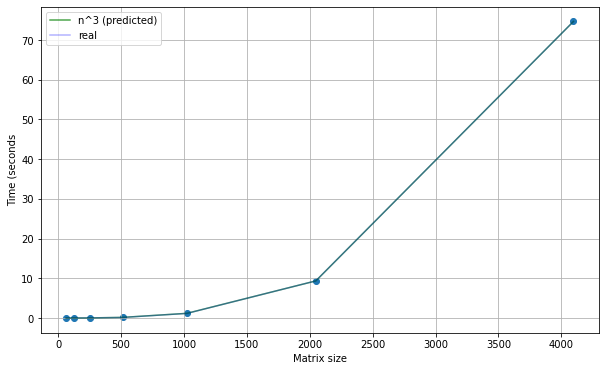

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(x, y)
ax.plot(x, y_predicted, color='green', label = 'n^3 (predicted)', alpha=0.7)
ax.plot(x, y, color='blue', label = 'real', alpha=0.3)
ax.grid()

ax.set_xlabel('Matrix size')
ax.set_ylabel('Time (seconds')
ax.legend()
plt.savefig('plot.png')
print(poly_reg_model.coef_)